## **E-values and e-vectors of a matrix A1**
---

>## Eigen Basics

- **Eigenvalues and Eigenvectors**
    - $A v = \lambda v$
    - Complex conjugate pairs: $A v^* = \lambda^* v^*$
    - Eigenvector: `E.vectors[:,k]` (stored as columns)

In [35]:
using LinearAlgebra

In [13]:
A = [1.39164   -0.417337  -1.04938
     -0.482258  -0.449806  -0.297397
      1.1709    -0.2278     1.98006]

E = eigen(A)

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
3-element Vector{ComplexF64}:
 -0.5492714681705643 + 0.0im
  1.7355827340852823 - 1.0454627840167563im
  1.7355827340852823 + 1.0454627840167563im
vectors:
3×3 Matrix{ComplexF64}:
    0.206377+0.0im    0.17411+0.639401im     0.17411-0.639401im
    0.978444+0.0im   0.105157-0.0907931im   0.105157+0.0907931im
 -0.00741578+0.0im  -0.735901-0.0im        -0.735901+0.0im

In [14]:
# verify A*v = lambda*v
for k = 1:3
    v=E.vectors[:,k]
    lam = E.values[k]
    display([A*v lam*v])
end

3×2 Matrix{ComplexF64}:
  -0.113357+0.0im   -0.113357+0.0im
  -0.537432+0.0im   -0.537432+0.0im
 0.00407327+0.0im  0.00407327-0.0im

3×2 Matrix{ComplexF64}:
  0.970653+0.927707im   0.970653+0.927707im
 0.0875883-0.267517im  0.0875883-0.267517im
  -1.27722+0.769357im   -1.27722+0.769357im

3×2 Matrix{ComplexF64}:
  0.970653-0.927707im   0.970653-0.927707im
 0.0875883+0.267517im  0.0875883+0.267517im
  -1.27722-0.769357im   -1.27722-0.769357im

In [15]:
#============================= EIGENVECTOR BASIS =========================#
# Check for a basis
V=E.vectors

# Note V' computes the complex conjugate transpose of the complex matrix V
# V'*V is theoretically guaranteed to have a real determinant, though
# numerically, it will have a small imaginary part

# Check linear independence of the columns of V
@show det(V'*V)

#============================= EIGENVECTOR REAL AND IMAGINARY BASIS =========================#
# real(E.vectors[:,1]) removes the zero imaginary part and makes it 
# a Float64 instead a ComplexF64

# real(E.vectors[:,2]) computes the real part of v2
# imag(E.vectors[:,2]) computes the imaginary part of v2

# Stack candidate basis vectors as columns of V_new
V_new = [real(E.vectors[:,1]) real(E.vectors[:,2]) imag(E.vectors[:,2])]

display(V_new)

# Check linear independence
@show det(V_new'*V_new)

3×3 Matrix{Float64}:
  0.206377     0.17411    0.639401
  0.978444     0.105157  -0.0907931
 -0.00741578  -0.735901  -0.0

det(V' * V) = 0.897060699129927 + 1.6064687371449844e-18im
det(V_new' * V_new) = 0.22426517478248179


0.22426517478248179

>## Dissecting Eigens

- **Scenario**: $A$ Matrix with one postive and one negative eigenvalue
$$
y = \dot{x} (t) = Ax(t)\\
x(t) = e^{A(t-t_0)} \cdot x_0 = e^{At} \cdot x_0  
$$
- **Key Takeaways**
    - Eigenvalue > 0 => exploding norm !!!
    - Eigenvalue < 0 => converging norm ...
$$
e^{At} \cdot v_i = e^{\lambda_i t} \cdot v_i
$$

In [54]:
using Plots, LinearAlgebra, LaTeXStrings

In [65]:
#============================= REAL EIGENVALUES AND EIGENVECTORS =========================#
A = [-2.76899   -4.14723; 0.606141   1.26899]
E = eigen(A)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 -2.0000057922545804
  0.50000579225458
vectors:
2×2 Matrix{Float64}:
 -0.98324    0.785355
  0.182314  -0.619045

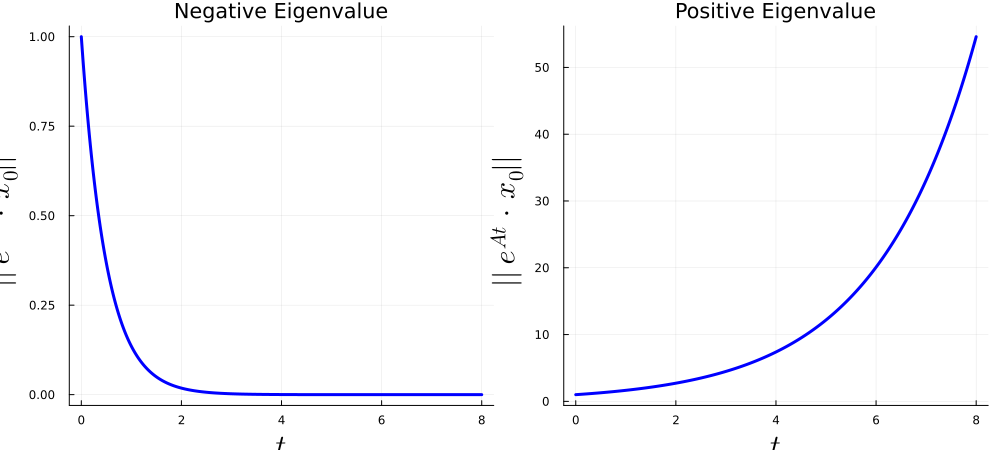

In [66]:
# Compute x(t) using given eigenvector
function normSolution(t; A, x0)
    eAt = exp(A*t)
    xt = eAt * x0
    y = norm(xt)
    return y
end

# Plot y = x'(t) and x(t)
t = 0:.01:8

y1 = normSolution.(t; A=A, x0=E.vectors[:,1])  # negative eigenvalue
y2 = normSolution.(t; A=A, x0=E.vectors[:,2])  # positive eigenvalue

gr()
p1 = plot(t,y1, guidefont = 20, title = "Negative Eigenvalue", legend = false, xlabel=L"t", ylabel=L"||e^{At}\cdot x_0 ||", lw=3, 
    color=:blue)
p2 = plot(t,y2, guidefont = 20, title = "Positive Eigenvalue" ,legend = false, xlabel=L"t", ylabel=L"||e^{At}\cdot x_0 ||", lw=3, 
    color=:blue)

plot(p1, p2, layout=(1, 2), size=(1000,450))

- **Complex Eigenvalues**: $\lambda = a + i\omega$, $v = v_R + iv_i$
$$    
\begin{aligned}
e^{(a + i\omega)t} & = e^{at} \cdot ( \cos(\omega t) + i \sin(\omega t)) \\\\
e^{At} v_R & = e^{at} \cos(\omega t) v_R -  e^{at} \sin(\omega t) v_I \\\\
e^{At} v_I & = e^{at} \sin(\omega t) v_R +  e^{at} \cos(\omega t) v_I
\end{aligned}
$$

In [67]:
#============================= COMPLEX EIGENVALUES AND EIGENVECTORS =========================#
A = [-1.89311  11.4911    2.83579   -21.4883
  1.93182  -6.88831  -0.662625    9.16832
 -1.47045   2.04612   0.130518   -8.23588
  1.59557  -4.41903  -0.95763     5.65091]

E=eigen(A)

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
4-element Vector{ComplexF64}:
 -2.000000213236534 - 1.9999961984135264im
 -2.000000213236534 + 1.9999961984135264im
 0.5000042132365348 - 2.9999956474834977im
 0.5000042132365348 + 2.9999956474834977im
vectors:
4×4 Matrix{ComplexF64}:
  -0.314334+0.172478im   -0.314334-0.172478im  …     0.77073+0.0im
 -0.0323151-0.563835im  -0.0323151+0.563835im     -0.0107431-0.313272im
  -0.654925-0.0im        -0.654925+0.0im            0.385818+0.320985im
  -0.121327-0.329915im   -0.121327+0.329915im     -0.0406637-0.232767im

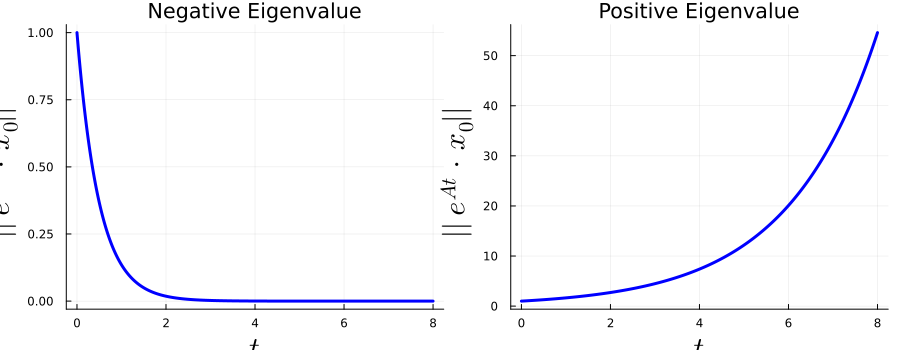

In [68]:
y3 = normSolution.(t; A=A, x0=E.vectors[:,1])  # negative real part eigenvalue: -2 -2i
y4 = normSolution.(t; A=A, x0=E.vectors[:,3])  # positive real part eigenvalue: 0.5 -3i

p3 = plot(t,y3, guidefont = 20, title = "Negative Eigenvalue", legend = false, xlabel=L"t", ylabel=L"||e^{At}\cdot x_0 ||", lw=3, color=:blue)
p4 = plot(t,y4, guidefont = 20, title = "Positive Eigenvalue", legend = false, xlabel=L"t", ylabel=L"||e^{At}\cdot x_0 ||", lw=3, color=:blue)

plot(p3, p4, layout=(1, 2), size=(900,350))

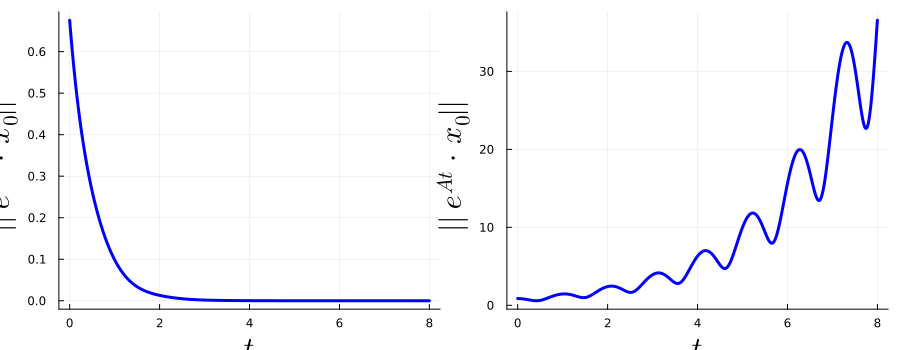

In [69]:
y5 = normSolution.(t; A=A, x0=imag(E.vectors[:,1]))  # negative real part eigenvalue: -2 -2i
y6 = normSolution.(t; A=A, x0=real(E.vectors[:,3]))  # positive real part eigenvalue: 0.5 -3i

p5 = plot(t,y5, guidefont = 20, legend = false, xlabel=L"t", ylabel=L"||e^{At}\cdot x_0 ||", lw=3, color=:blue)
p6 = plot(t,y6, guidefont = 20, legend = false, xlabel=L"t", ylabel=L"||e^{At}\cdot x_0 ||", lw=3, color=:blue)

plot(p5, p6, layout=(1, 2), size=(900,350))

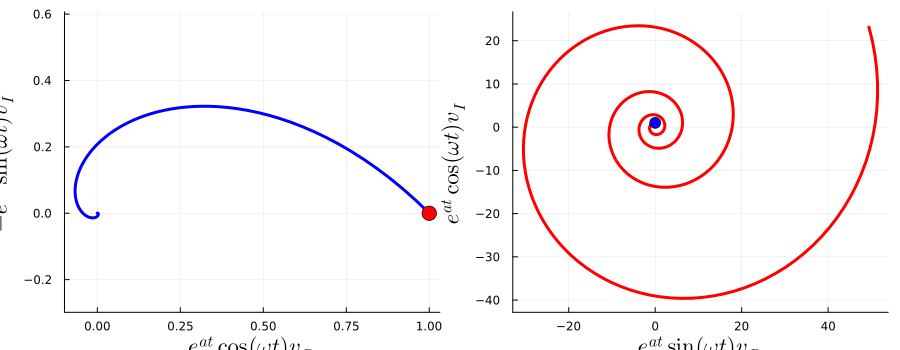

In [ ]:
# Reanylization of the complex eigenvalues and eigenvectors
(lam1, lam2, lam3, lam4) = E.values
(v1, v2, v3, v4) = E.vectors

t = 0.0:0.02:100

# For x0 = real(v1)
x1 =  exp.(real(lam1)*t).*cos.(imag(lam1)*t)
y1 = -exp.(real(lam1)*t).*sin.(imag(lam1)*t)

p1 = plot(x1, y1, guidefont = 15, lw=3, color=:blue, legend=false, 
    aspect_ratio=1, xlabel=L"e^{at}\cos(\omega t) v_R", ylabel=L"-e^{at}\sin(\omega t) v_I")

# mark the initial condition
scatter!([1], [0], markersize=8, color=:red)



t = 0.0:0.02:8

# For x0 = imag(v3)
x2 = exp.(real(lam3)*t).*sin.(imag(lam3)*t)
y2 = exp.(real(lam3)*t).*cos.(imag(lam3)*t)

p2 = plot(x2, y2, guidefont = 15, lw=3, color=:red, legend=false, 
    aspect_ratio=1, xlabel=L"e^{at}\sin(\omega t) v_R", ylabel=L"e^{at}\cos(\omega t) v_I")

# mark the initial condition
scatter!([0], [1], markersize=6, color=:blue)

#png(p1, "SpiralInwardPreviousExample")
#png(p1, "SpiralOutwardPreviousExample")
plot(p1, p2, layout=(1, 2), size=(900, 350))